In [1]:
import pandas as pd

data = {
    "Age": [22, 25, 28, 32, 35, 40, 45, 48, 50, 55],
    "Salary": [20000, 25000, 30000, 45000, 60000, 70000, 80000, 85000, 90000, 95000],
    "Visits": [1, 2, 2, 3, 4, 5, 6, 6, 7, 8],
    "Purchased": [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)
df


,Age,Salary,Visits,Purchased
0,22,20000,1,0
1,25,25000,2,0
2,28,30000,2,0
3,32,45000,3,0
4,35,60000,4,1
5,40,70000,5,1
6,45,80000,6,1
7,48,85000,6,1
8,50,90000,7,1
9,55,95000,8,1


In [2]:
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        10 non-null     int64
 1   Salary     10 non-null     int64
 2   Visits     10 non-null     int64
 3   Purchased  10 non-null     int64
dtypes: int64(4)
memory usage: 452.0 bytes


,Age,Salary,Visits,Purchased
count,10.000000,10.000000,10.000000,10.000000
mean,38.000000,60000.000000,4.400000,0.600000
std,11.333333,28284.271247,2.366432,0.516398
min,22.000000,20000.000000,1.000000,0.000000
25%,29.000000,33750.000000,2.250000,0.000000
50%,37.500000,65000.000000,4.500000,1.000000
75%,47.250000,83750.000000,6.000000,1.000000
max,55.000000,95000.000000,8.000000,1.000000


In [3]:
df[['Age','Salary','Visits']].mean()
df[['Age','Salary','Visits']].median()
df[['Age','Salary','Visits']].std()


Age          11.333333
Salary    28284.271247
Visits        2.366432
dtype: float64

In [4]:
df[['Age','Salary','Visits']].mean()

Age          38.0
Salary    60000.0
Visits        4.4
dtype: float64

In [5]:
df[['Age','Salary','Visits']].median()

Age          37.5
Salary    65000.0
Visits        4.5
dtype: float64

In [6]:
df[['Age','Salary','Visits']].std()

Age          11.333333
Salary    28284.271247
Visits        2.366432
dtype: float64

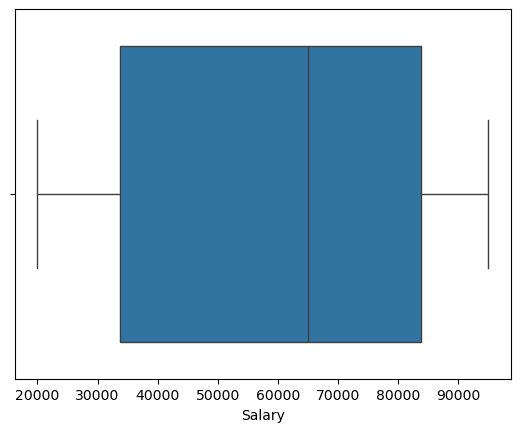

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Salary'])
plt.show()


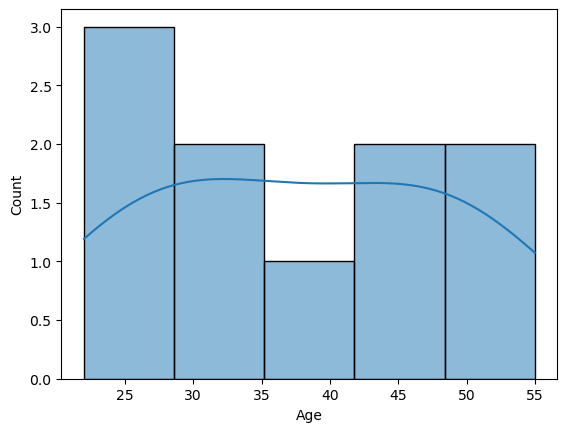

In [8]:
sns.histplot(df['Age'], kde=True)
plt.show()


In [9]:
df.corr()


,Age,Salary,Visits,Purchased
Age,1.000000,0.987870,0.994299,0.854335
Salary,0.987870,1.000000,0.987724,0.912871
Visits,0.994299,0.987724,1.000000,0.872872
Purchased,0.854335,0.912871,0.872872,1.000000


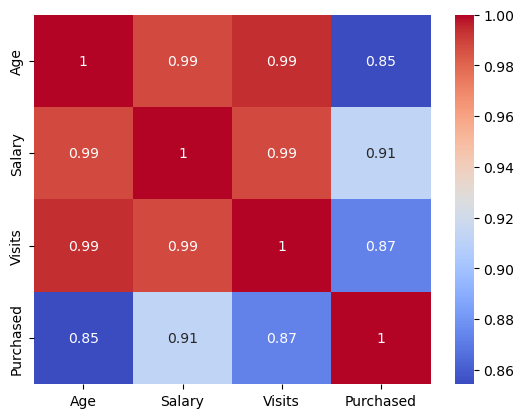

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [11]:
df['Purchased'].value_counts(normalize=True)


Purchased
1    0.6
0    0.4
Name: proportion, dtype: float64

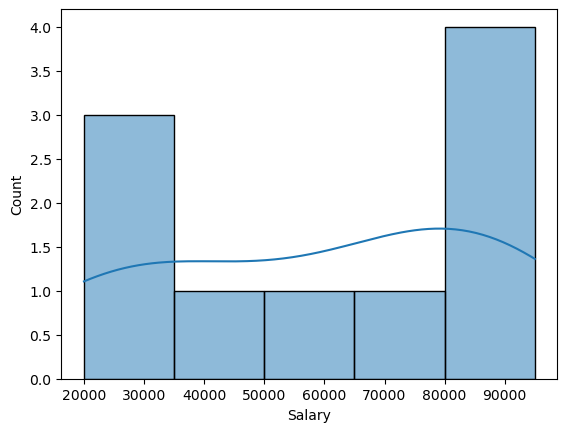

In [13]:
sns.histplot(df['Salary'], kde=True)
plt.show()

In [15]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['Salary'] < lower) | (df['Salary'] > upper)]


In [16]:
X = df[['Age', 'Salary', 'Visits']]   # Features
y = df['Purchased']                  # Target


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [22]:
y_pred = model.predict(X_test_scaled)


In [23]:
y_prob = model.predict_proba(X_test_scaled)


In [24]:
y_pred

array([1, 0])

In [27]:
y_prob

array([[0.03145532, 0.96854468],
       [0.85425738, 0.14574262]])

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1 0]
 [0 1]]


In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[1, 0],
       [0, 1]])

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_test_scaled)[:,1]

auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", auc)


ROC-AUC: 1.0


In [32]:
# custom threshold
y_custom = (y_prob >= 0.4).astype(int)


In [33]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)


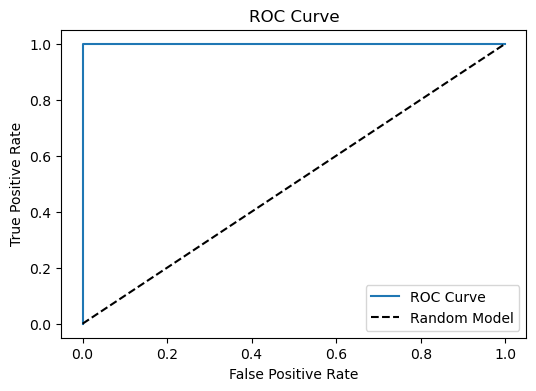

In [34]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1], [0,1], 'k--', label="Random Model")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
